In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob

In [22]:
n_face = []
s_face = []
i = 0
for filename in glob.glob('/content/drive/MyDrive/ECE269HW4/Data_Face/*a.jpg'):
  face = cv2.imread(filename, cv2.COLOR_BGR2GRAY)
  n_face.append(face)

for filename2 in glob.glob('/content/drive/MyDrive/ECE269HW4/Data_Face/*b.jpg'):
  face2 = cv2.imread(filename2, cv2.COLOR_BGR2GRAY)
  s_face.append(face2)

In [287]:
np.random.seed(0)
n100 = np.random.choice(171, 100, replace=False)
s100 = np.random.choice(171, 100, replace=False)

In [184]:
N_face = np.asarray(n_face)
S_face = np.asarray(s_face)
N_100 = N_face[n100]
S_100 = S_face[s100]


In [286]:
n_test =[]
for i in range(N_face.shape[0]):
  if i not in n100:
    n_test.append(N_face[i])
N_test = np.asarray(n_test)
s_test = []
for j in range(S_face.shape[0]):
  if j not in s100:
    s_test.append(S_face[j])
S_test = np.asarray(s_test)

#Question 1

In [185]:
N_phi = N_100-np.mean(N_100,axis = 0)
S_phi = S_100-np.mean(S_100,axis = 0)

In [186]:
N_flatten = N_phi.reshape((100,31266))

In [201]:
C_N = np.matmul(N_flatten,N_flatten.transpose())
N_values,N_vectors = np.linalg.eig(C_N)
sort_idx = np.argsort(-N_values)
N_values_sorted = N_values[sort_idx]
N_vectors_sorted = N_vectors[:,sort_idx]



In [206]:
N_eigen_faces = np.matmul(N_flatten.transpose(), N_vectors_sorted)
N_eigen_faces = N_eigen_faces/np.linalg.norm(N_eigen_faces,axis = 0)

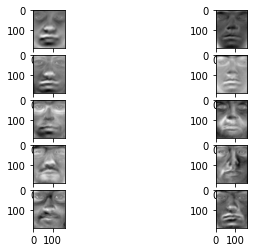

In [207]:
Figure1 = plt.figure()
for i in range(10):
  F1 = Figure1.add_subplot(5,2,i+1)
  F1.imshow(N_eigen_faces[:,i].reshape(193,162),cmap = 'gray')

Text(0.5, 1.0, 'Neutral face singular values')

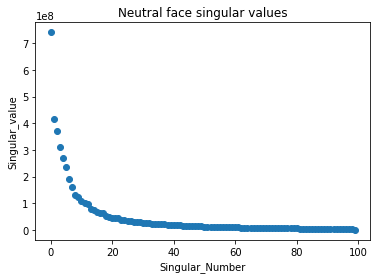

In [190]:
x_axis = range(100)
plt.scatter(x_axis, N_values_sorted)
plt.xlabel("Singular_Number")
plt.ylabel("Singular_value")
plt.title("Neutral face singular values")


In [215]:
S_flatten = S_phi.reshape((100,31266))
C_S = np.matmul(S_flatten,S_flatten.transpose())
S_values,S_vectors = np.linalg.eig(C_S)
sort_idx = np.argsort(-S_values)
S_values_sorted = S_values[sort_idx]
S_vectors_sorted = S_vectors[:,sort_idx]

S_eigen_faces = np.matmul(S_flatten.transpose(), S_vectors_sorted)
S_eigen_faces = S_eigen_faces/np.linalg.norm(S_eigen_faces,axis = 0)

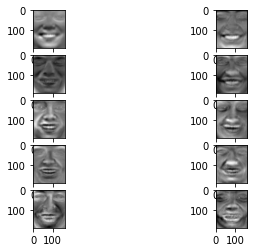

In [193]:
Figure1 = plt.figure()
for i in range(10):
  F1 = Figure1.add_subplot(5,2,i+1)
  F1.imshow(S_eigen_faces[:,i].reshape(193,162),cmap = 'gray')

Text(0.5, 1.0, 'Smile face singular values')

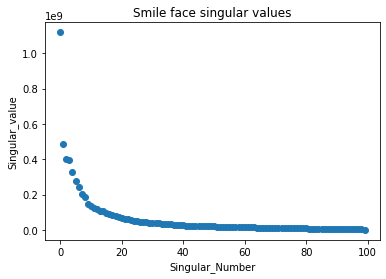

In [194]:
x_axis = range(100)
plt.scatter(x_axis, S_values_sorted)
plt.xlabel("Singular_Number")
plt.ylabel("Singular_value")
plt.title("Smile face singular values")

#Question 2


[1068.99603149486, 1008.5558898773102, 854.3973205821633, 836.1772313517513, 508.6297780861749, 426.2299877392736, 405.36273784223397, 270.4784328957482, 111.97198620941593, 7.693775226374593]


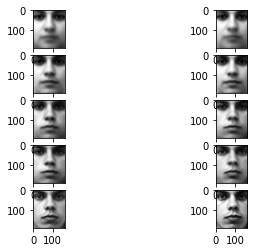

In [211]:
face_rec = N_flatten[0]
PC_number = [1,2,3,5,10,15,20,25,50,95]
mse = []
Figure3 = plt.figure()
j = 0

for ii in PC_number:
  e_f = N_eigen_faces[:,:ii+1]
  w_k = np.matmul(e_f.T,face_rec)
  rec = 0
  for k in range(ii):
    rec += w_k[k]*e_f[:,k]
  rec_face = rec+np.mean(N_100,axis=0).flatten()
  mse.append(((N_flatten[0]-rec)**2).mean())
  F3 = Figure3.add_subplot(5,2,j+1)
  F3.imshow(rec_face.reshape(193,162),cmap='gray')
  j+=1
print(mse)

Text(0.5, 1.0, 'Neutral face mse values')

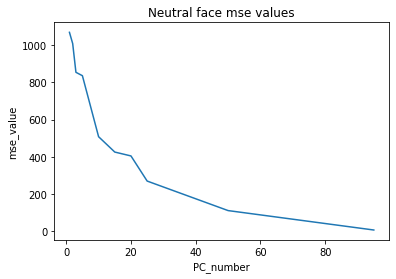

In [213]:
plt.plot(PC_number, mse)
plt.xlabel("PC_number")
plt.ylabel("mse_value")
plt.title("Neutral face mse values")

**Comment: More PCs will leads more accuracy for the reconstruction, and at first the recontruct images are very similar to eigen faces**

#Question 3

[1613.5467208605255, 1594.5548407265997, 1276.0474345824427, 1206.3039240870664, 942.2864623085462, 698.513620996678, 621.1294043789062, 475.0193495988998, 161.8579876280396, 2.426422785017443]


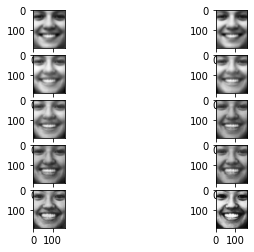

In [223]:
face_rec = S_flatten[0]
PC_number = [1,2,3,5,10,15,20,25,50,95]
mse = []
Figure3 = plt.figure()
j = 0

for ii in PC_number:
  e_f = S_eigen_faces[:,:ii+1]
  w_k = np.matmul(e_f.T,face_rec)
  rec = 0
  for k in range(ii):
    rec += w_k[k]*e_f[:,k]
  rec_face = rec+np.mean(S_100,axis=0).flatten()
  mse.append(((S_flatten[0]-rec)**2).mean())
  F3 = Figure3.add_subplot(5,2,j+1)
  F3.imshow(rec_face.reshape(193,162),cmap='gray')
  j+=1
print(mse)

Text(0.5, 1.0, 'Smiling face mse values')

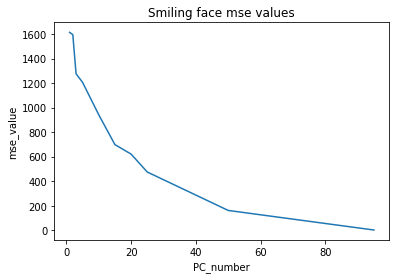

In [224]:
plt.plot(PC_number, mse)
plt.xlabel("PC_number")
plt.ylabel("mse_value")
plt.title("Smiling face mse values")

**Comment: More PCs will leads more accuracy for the reconstruction, and at first the recontruct images are very similar to eigen faces**

#Question 4

[1294.9685687373808, 1081.9196867488763, 1048.7672251025829, 931.4627316145211, 889.5351562101295, 779.1076127065835, 624.0415358772127, 611.1154201923812, 440.0956961814275, 363.10369890014425]


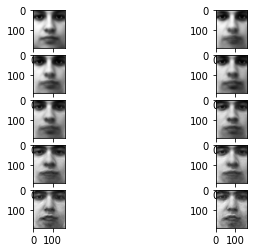

In [221]:
gdt = N_face[0].flatten()
face_rec = N_face[0].flatten()-np.mean(N_100,axis=0).flatten()

PC_number = [1,2,3,5,10,15,20,25,50,100]
mse = []
Figure3 = plt.figure()
j = 0

for ii in PC_number:
  e_f = N_eigen_faces[:,:ii+1]
  w_k = np.matmul(e_f.T,face_rec)
  rec = 0
  for k in range(ii):
    rec += w_k[k]*e_f[:,k]
  rec_face = rec+np.mean(N_100,axis=0).flatten()
  mse.append(((gdt-rec_face)**2).mean())
  F3 = Figure3.add_subplot(5,2,j+1)
  F3.imshow(rec_face.reshape(193,162),cmap='gray')
  j+=1
print(mse)

Text(0.5, 1.0, 'N face mse values')

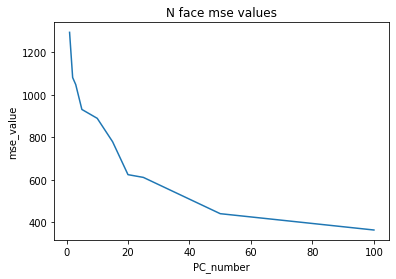

In [222]:
plt.plot(PC_number, mse)
plt.xlabel("PC_number")
plt.ylabel("mse_value")
plt.title("N face mse values")

[1555.6530121249373, 1549.4024963081222, 1538.9194273302724, 1391.920200903054, 1091.3048861859477, 843.6986872070185, 680.2804265746935, 648.4897497544816, 510.4248829145086, 435.7702846428922]


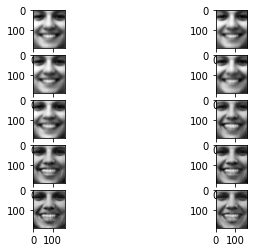

In [242]:
gdt = S_test[0].flatten()
face_rec = S_test[0].flatten()-np.mean(S_100,axis=0).flatten()

PC_number = [1,2,3,5,10,15,20,25,50,100]
mse = []
Figure3 = plt.figure()
j = 0

for ii in PC_number:
  e_f = S_eigen_faces[:,:ii+1]
  w_k = np.matmul(e_f.T,face_rec)
  rec = 0
  for k in range(ii):
    rec += w_k[k]*e_f[:,k]
  rec_face = rec+np.mean(S_100,axis=0).flatten()
  mse.append(((gdt-rec_face)**2).mean())
  F3 = Figure3.add_subplot(5,2,j+1)
  F3.imshow(rec_face.reshape(193,162),cmap='gray')
  j+=1
print(mse)

Text(0.5, 1.0, 'N face mse values')

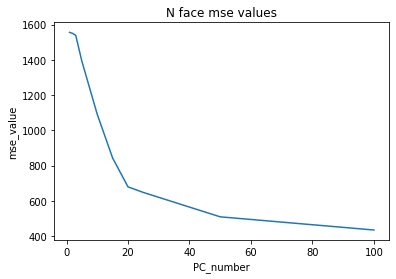

In [243]:
plt.plot(PC_number, mse)
plt.xlabel("PC_number")
plt.ylabel("mse_value")
plt.title("N face mse values")

#Question 5

a)

In [290]:
np.random.seed(0)
n30 = np.random.choice(71,30 , replace=False)
s30 = np.random.choice(71,30, replace=False)
N_clas = N_test[n30]
S_clas = S_test[s30]

b)

3


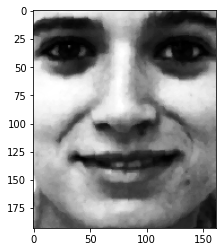

In [291]:
mistake = []
mis = 0
for ii in N_clas:
  gdt = ii.flatten()
  face_rec_s = gdt-np.mean(S_100,axis=0).flatten()
  face_rec_n = gdt-np.mean(N_100,axis=0).flatten()
  e_f_s = S_eigen_faces
  e_f_n = N_eigen_faces

  w_k_n = np.matmul(e_f_n.T,face_rec_n)
  w_k_s = np.matmul(e_f_s.T,face_rec_s
                    )
  rec_n = 0
  rec_s = 0
  for k in range(100):
    rec_n += w_k_n[k]*e_f_n[:,k]
    rec_s += w_k_s[k]*e_f_s[:,k]
  
  rec_face_s = rec_s+np.mean(S_100,axis=0).flatten()
  rec_face_n = rec_n+np.mean(N_100,axis=0).flatten()

  mse_n = ((gdt-rec_face_n)**2).mean()
  mse_s = ((gdt-rec_face_s)**2).mean()
  if mse_n>=mse_s:
    mistake.append(ii)
    mis+=1
print(mis)
plt.imshow(mistake[0],cmap = 'gray')

3


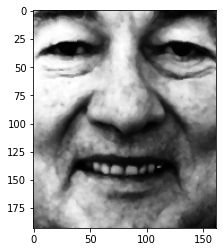

In [288]:
mistake = []
mis = 0
i = 0
for ii in S_clas:
  gdt = ii.flatten()

  plt.imshow(gdt.reshape(193,162),cmap='gray')
  face_rec_s = gdt-np.mean(S_100,axis=0).flatten()
  face_rec_n = gdt-np.mean(N_100,axis=0).flatten()
  e_f_s = S_eigen_faces
  e_f_n = N_eigen_faces

  w_k_n = np.matmul(e_f_n.T,face_rec_n)
  w_k_s = np.matmul(e_f_s.T,face_rec_s)
  rec_n = 0
  rec_s = 0
  for k in range(100):
    rec_n += w_k_n[k]*e_f_n[:,k]
    rec_s += w_k_s[k]*e_f_s[:,k]
  
  rec_face_s = rec_s+np.mean(S_100,axis=0).flatten()
  rec_face_n = rec_n+np.mean(N_100,axis=0).flatten()
  mse_n = 0
  mse_s = 0
  mse_n = ((gdt-rec_face_n)**2).mean()
  mse_s = ((gdt-rec_face_s)**2).mean()
  if mse_n<mse_s:
    mistake.append(ii)
    mis+=1


print(mis)
plt.imshow(mistake[0],cmap = 'gray')

**f) These two image are hard to determine smile or neutral even from human eyes. Suggestion is maybe add more training data to avoid the similar image which affects the results.**